In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
data = pd.read_csv('usa.csv')
data

,Series Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,SH.STA.SUIC.P5,11.0,11.4,11.8,11.7,11.9,11.9,12.1,12.4,12.7,...,13.4,13.5,13.5,14.0,14.4,15.1,15.9,15.7,16.1,..
1,SH.STA.SUIC.FE.P5,4.5,4.7,5.0,5.0,5.4,5.2,5.4,5.5,5.6,...,6.0,6.1,6.2,6.5,6.8,7.0,7.1,7.2,7.5,..
2,SH.STA.SUIC.MA.P5,17.7,18.3,18.8,18.6,18.6,18.7,19.1,19.5,20.0,...,20.9,21.1,21.0,21.6,22.2,23.5,24.9,24.3,25.0,..


In [3]:
data1 = data.drop(columns=['2020','Series Code']).T
data1.reset_index(level=0, inplace=True)
data1

,index,0,1,2
0,2000,11.0,4.5,17.7
1,2001,11.4,4.7,18.3
2,2002,11.8,5.0,18.8
3,2003,11.7,5.0,18.6
4,2004,11.9,5.4,18.6
5,2005,11.9,5.2,18.7
6,2006,12.1,5.4,19.1
7,2007,12.4,5.5,19.5
8,2008,12.7,5.6,20.0
9,2009,12.8,5.7,20.0


# I. Change Over Time

/Users/atreish/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/atreish/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/atreish/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


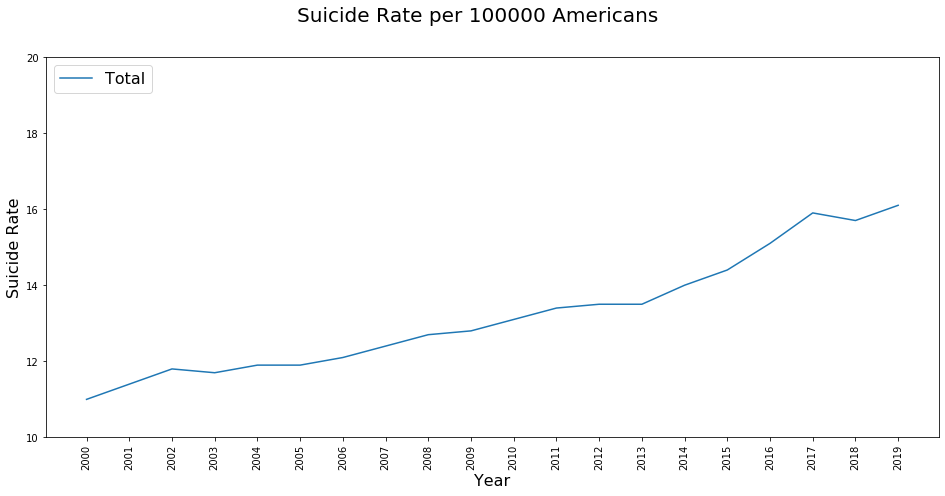

In [4]:
plt.figure(figsize=(16,7))
plt.suptitle('Suicide Rate per 100000 Americans', fontsize=20)
plt.plot(data1['index'],data1[0],label='Total')
plt.xticks(data1['index'], rotation ='vertical')
plt.ylabel('Suicide Rate',fontsize=16)
plt.xlabel('Year',fontsize=16)
plt.ylim((10,20))
plt.legend(loc='upper left',fontsize=16)
plt.savefig('changeovertime.pdf')
plt.show()

# II. Drill Down

/Users/atreish/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/atreish/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/atreish/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


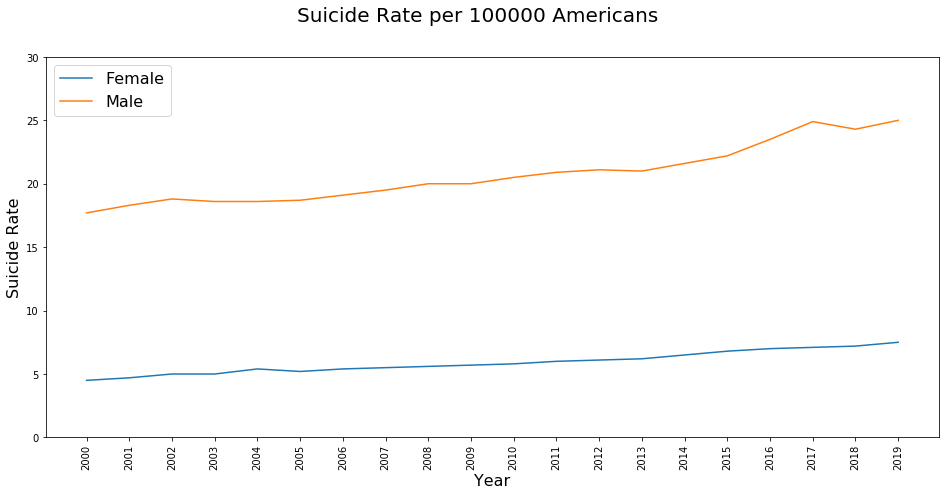

In [5]:
plt.figure(figsize=(16,7))
plt.suptitle('Suicide Rate per 100000 Americans', fontsize=20)
plt.plot(data1['index'],data1[1],label='Female')
plt.plot(data1['index'],data1[2],label='Male')
plt.xticks(data1['index'], rotation ='vertical')
plt.ylabel('Suicide Rate',fontsize=16)
plt.xlabel('Year',fontsize=16)
plt.ylim((0,30))
plt.legend(loc='upper left',fontsize=16)
plt.savefig('drilldown.pdf')
plt.show()

# III. Zoom Out

In [6]:
states = pd.read_csv('2019.csv')
states = states.drop(columns=['URL'])

In [7]:
states.head(5)

,YEAR,STATE,RATE,DEATHS
0,2019,AL,16.3,804
1,2019,AK,28.5,210
2,2019,AZ,18.7,1419
3,2019,AR,18.0,548
4,2019,CA,10.7,4436


In [8]:
sorted_states = states.sort_values(["RATE"], ascending=False)
sorted_states1 = states.sort_values(["DEATHS"], ascending=False)

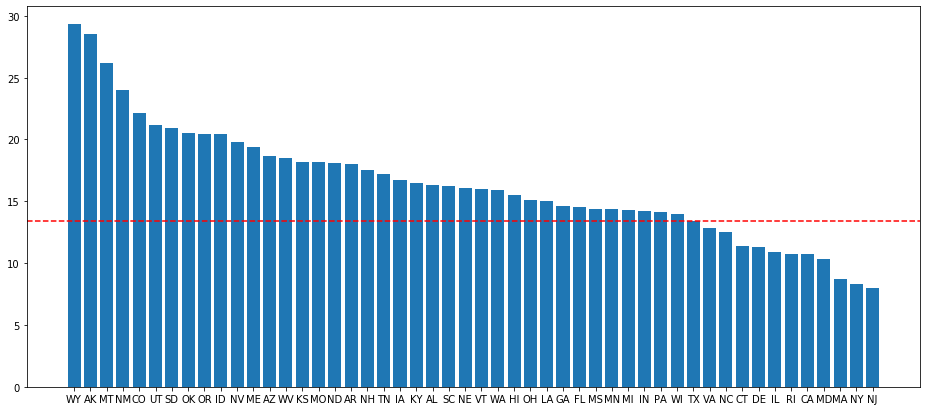

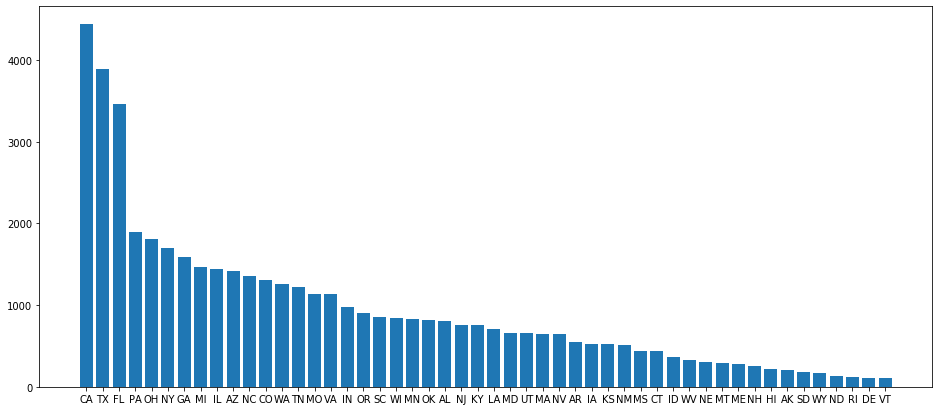

In [9]:
plt.figure(figsize=(16,7))
plt.bar(sorted_states.STATE,sorted_states.RATE)
plt.axhline(y = 13.42, color ="red", linestyle ="--")
plt.savefig('zoomout.pdf')
plt.show()

plt.figure(figsize=(16,7))
plt.bar(sorted_states1.STATE,sorted_states1.DEATHS)
plt.savefig('zoomout1.pdf')
plt.show()

# IV. Contrast

In [10]:
top5 = sorted_states.iloc[:5]
bottom5 = sorted_states.iloc[-5:]
frames = [top5, bottom5]
contrastedf = pd.concat(frames)
contrastedf

,YEAR,STATE,RATE,DEATHS
49,2019,WY,29.3,170
1,2019,AK,28.5,210
25,2019,MT,26.2,289
30,2019,NM,24.0,513
5,2019,CO,22.1,1312
4,2019,CA,10.7,4436
19,2019,MD,10.3,657
20,2019,MA,8.7,647
31,2019,NY,8.3,1705
29,2019,NJ,8.0,762


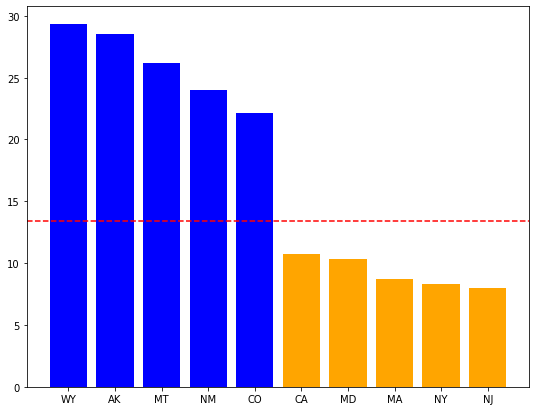

In [11]:
color = ['blue','blue','blue','blue','blue','orange','orange','orange','orange','orange']

plt.figure(figsize=(9,7))
plt.bar(contrastedf.STATE,contrastedf.RATE, color=color)
plt.axhline(y = 13.42, color ="red", linestyle ="--")
plt.savefig('contrast.pdf')
plt.show()

# V. INTERSECTION

In [12]:
colordf = pd.read_csv('color.csv')
colordf = colordf.sort_values(["RATE"], ascending=False)

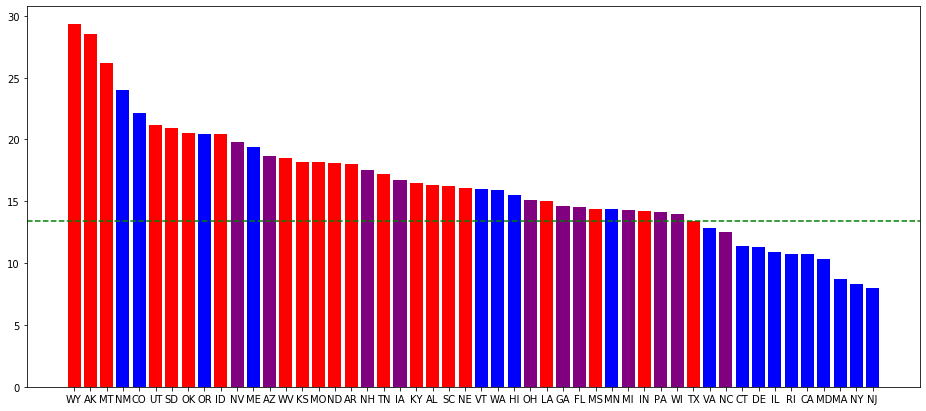

In [13]:
plt.figure(figsize=(16,7))
plt.bar(colordf.STATE, colordf.RATE, color=colordf.Color)
plt.axhline(y=13.42, color ="green", linestyle ="--")
plt.savefig('intersection.pdf')
plt.show()

# VI. Factors

In [14]:
race = pd.read_csv('raw_data.csv')
merged = pd.merge(left=sorted_states, right=race, left_on='STATE', right_on='Location')
merged = merged.sort_values(["RATE"], ascending=False)

In [15]:
merged.columns

Index(['YEAR', 'STATE', 'RATE', 'DEATHS', 'Location', 'White', 'Black',
       'Hispanic', 'Asian', 'American Indian/Alaska Native', 'Multiple Races'],
      dtype='object')

In [16]:
top5 = merged.iloc[:5]
bottom5 = merged.iloc[-5:]
frames1 = [top5, bottom5]
merged = pd.concat(frames1)

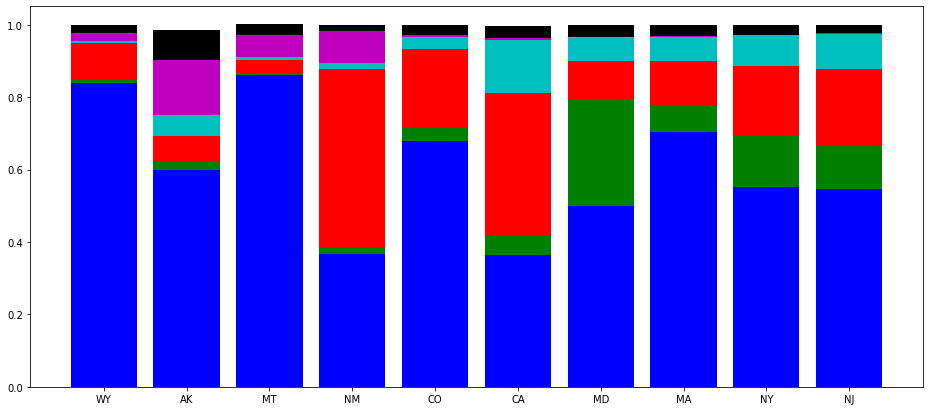

In [17]:
plt.figure(figsize=(16,7))
plt.bar(merged.STATE, merged.White, color='b')
plt.bar(merged.STATE, merged.Black, bottom=merged.White, color='g')
plt.bar(merged.STATE, merged.Hispanic, bottom=merged.Black+merged.White, color='r')
plt.bar(merged.STATE, merged.Asian, bottom=merged.Hispanic+merged.Black+merged.White, color='c')
plt.bar(merged.STATE, merged.iloc[:,9], bottom=merged.Asian+merged.Hispanic+merged.Black+merged.White, color='m')
plt.bar(merged.STATE, merged.iloc[:,10], bottom=merged.iloc[:,9]+merged.Asian+merged.Hispanic+merged.Black+merged.White, color='k')
plt.savefig('factors.pdf')
plt.show()

# VII. Outliers

In [18]:
region = pd.read_csv('https://raw.githubusercontent.com/cphalpert/census-regions/master/us%20census%20bureau%20regions%20and%20divisions.csv')

In [19]:
outliers = pd.merge(left=sorted_states, right=region, left_on='STATE', right_on='State Code')
outliers['Region'].unique()

array(['West', 'Midwest', 'South', 'Northeast'], dtype=object)

In [20]:
west = outliers[outliers['Region']=='West']
northeast = outliers[outliers['Region']=='Northeast']
midwest = outliers[outliers['Region']=='Midwest']
south = outliers[outliers['Region']=='South']
columns = [west.RATE, northeast.RATE, midwest.RATE, south.RATE]

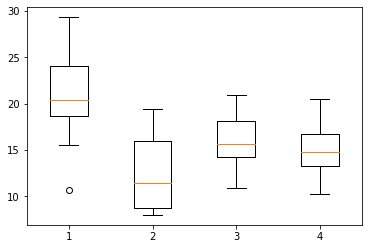

In [23]:
fig, ax = plt.subplots()
ax.boxplot(columns)
plt.savefig('outliers.pdf')
plt.show()

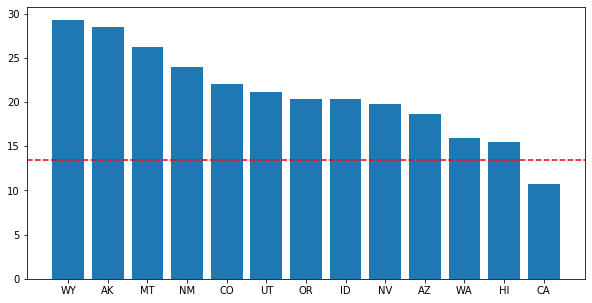

In [24]:
plt.figure(figsize=(10,5))
plt.bar(west.STATE, west.RATE)
plt.axhline(y=13.42, color ="red", linestyle ="--")
plt.savefig('outliers1.pdf')
plt.show()

**References**

https://databank.worldbank.org/reports.aspx?source=world-development-indicators

https://www.cdc.gov/nchs/pressroom/sosmap/suicide-mortality/suicide.htm

https://thehoya.com/off-the-wall-red-blue-purple-the-visuality-of-the-electoral-map/

https://www.kff.org/other/state-indicator/distribution-by-raceethnicity/?currentTimeframe=0&sortModel=%7B%22colId%22:%22Location%22,%22sort%22:%22asc%22%7D